In [1]:
from raft_opt_modular import raft_opt_modular
import yaml
import os
import raft
import matplotlib.pyplot as plt
import numpy as np

In [2]:
user_input_file = 'user_input.yaml'

with open('oc4_semisub.yaml') as file:
    design = yaml.load(file, Loader=yaml.FullLoader)

with open(user_input_file) as file:
    user_input = yaml.load(file, Loader=yaml.FullLoader)

# design['cases']['data']

In [3]:
tension_max = []
tension_min = []
tension_all = []
power = []
wind_heading = np.arange(0, 360, 15)*np.pi/180
# wind_heading = np.arange(0, 40, 5) # wind speed
# wind_heading = np.arange(0, 12, 1) # wave height
# wind_heading = np.arange(0, 25, 1) # wave period
# wind_heading = np.arange(0, 1, 0.1) # current speed
surge_max = []
pitch_max = []
heave_max = []
sway_max = []
wind_p = []

for wind_h in wind_heading:
    design['cases']['data'] = [user_input['cases']['data'][1]]
    design['cases']['data'][0][8] = wind_h  ## wave-wind direction
    # design['cases']['data'][0][7] = wind_h ## wave height
    # design['cases']['data'][0][6] = wind_h # wave period
    # design['cases']['data'][0][0] = wind_h ## wind speed
    # design['cases']['data'][0][9] = wind_h ## wave height

    model = raft.Model(design)
    model.analyzeUnloaded()

    model.solveEigen()
    model.analyzeCases(display=1)
    print(1/model.results['eigen']['frequencies'])
    model.fowtList[0].ms.getTensions()
    # model.fowtList[0].rotorList[0].aero_power

    print(f"Time priod of Heave = ",  round(1/model.results['eigen']['frequencies'][2], 2))
    print(f"Timperiod of Pitch = ",  round(1/model.results['eigen']['frequencies'][3], 2))
    print("tensions = ", max(model.fowtList[0].ms.getTensions()))

    try:
        print("rotor power", model.fowtList[0].rotorList[0].aero_power)
        wind_p.append(wind_h)
        power.append(model.fowtList[0].rotorList[0].aero_power)
    
    except: 
        power.append(0)
        print("Power Not Found Error")
        
    surge_max.append(model.results['case_metrics'][0][0]['surge_max'])
    sway_max.append(model.results['case_metrics'][0][0]['sway_max'])
    pitch_max.append(model.results['case_metrics'][0][0]['pitch_max'])
    heave_max.append(model.results['case_metrics'][0][0]['heave_max'])
    
    # surge_max.append(model.fowtList[0].Xi0[0] )
    # sway_max.append(model.fowtList[0].Xi0[1] )
    # pitch_max.append(model.fowtList[0].Xi0[4] )
    # heave_max.append(model.fowtList[0].Xi0[2])

    tension_max.append(max(model.results['case_metrics'][0][0]['Tmoor_max']))
    tension_min.append(min(model.results['case_metrics'][0][0]['Tmoor_max']))
    tension_all.append(model.results['case_metrics'][0][0]['Tmoor_max'])

Making FOWT
Found mean offets of FOWT 1 with with surge = -0.00 m and pitch = -0.00 deg.

--------- Natural frequencies and mode shapes -------------
Mode        1         2         3         4         5         6
Fn (Hz)    0.0079    0.0079    0.0582    0.0398    0.0398    0.0115

DOF 1     -1.0000    0.0011    0.0000   -0.0000   -0.9966   -0.0000
DOF 2     -0.0002    1.0000    0.0000   -0.9966    0.0000   -0.0001
DOF 3      0.0000   -0.0000   -1.0000    0.0000   -0.0000   -0.0000
DOF 4     -0.0000    0.0007   -0.0000    0.0824   -0.0000    0.0000
DOF 5      0.0007   -0.0000    0.0000   -0.0000   -0.0824   -0.0000
DOF 6      0.0000   -0.0000   -0.0000    0.0000   -0.0000    1.0000
-----------------------------------------------------------

--------------------- Running Case 1 ----------------------
[7.5, 0, 0.01, 'operating', 0, 'JONSWAP', 8.0, 2, 0.0, 0.2, 275]
FOWT 1
 F_undisplaced +0.00e+00  +0.00e+00  +6.63e+05  +0.00e+00  -1.17e-07  +0.00e+00
Wind speed: 7.50 m/s, Omega: 8.85 rp

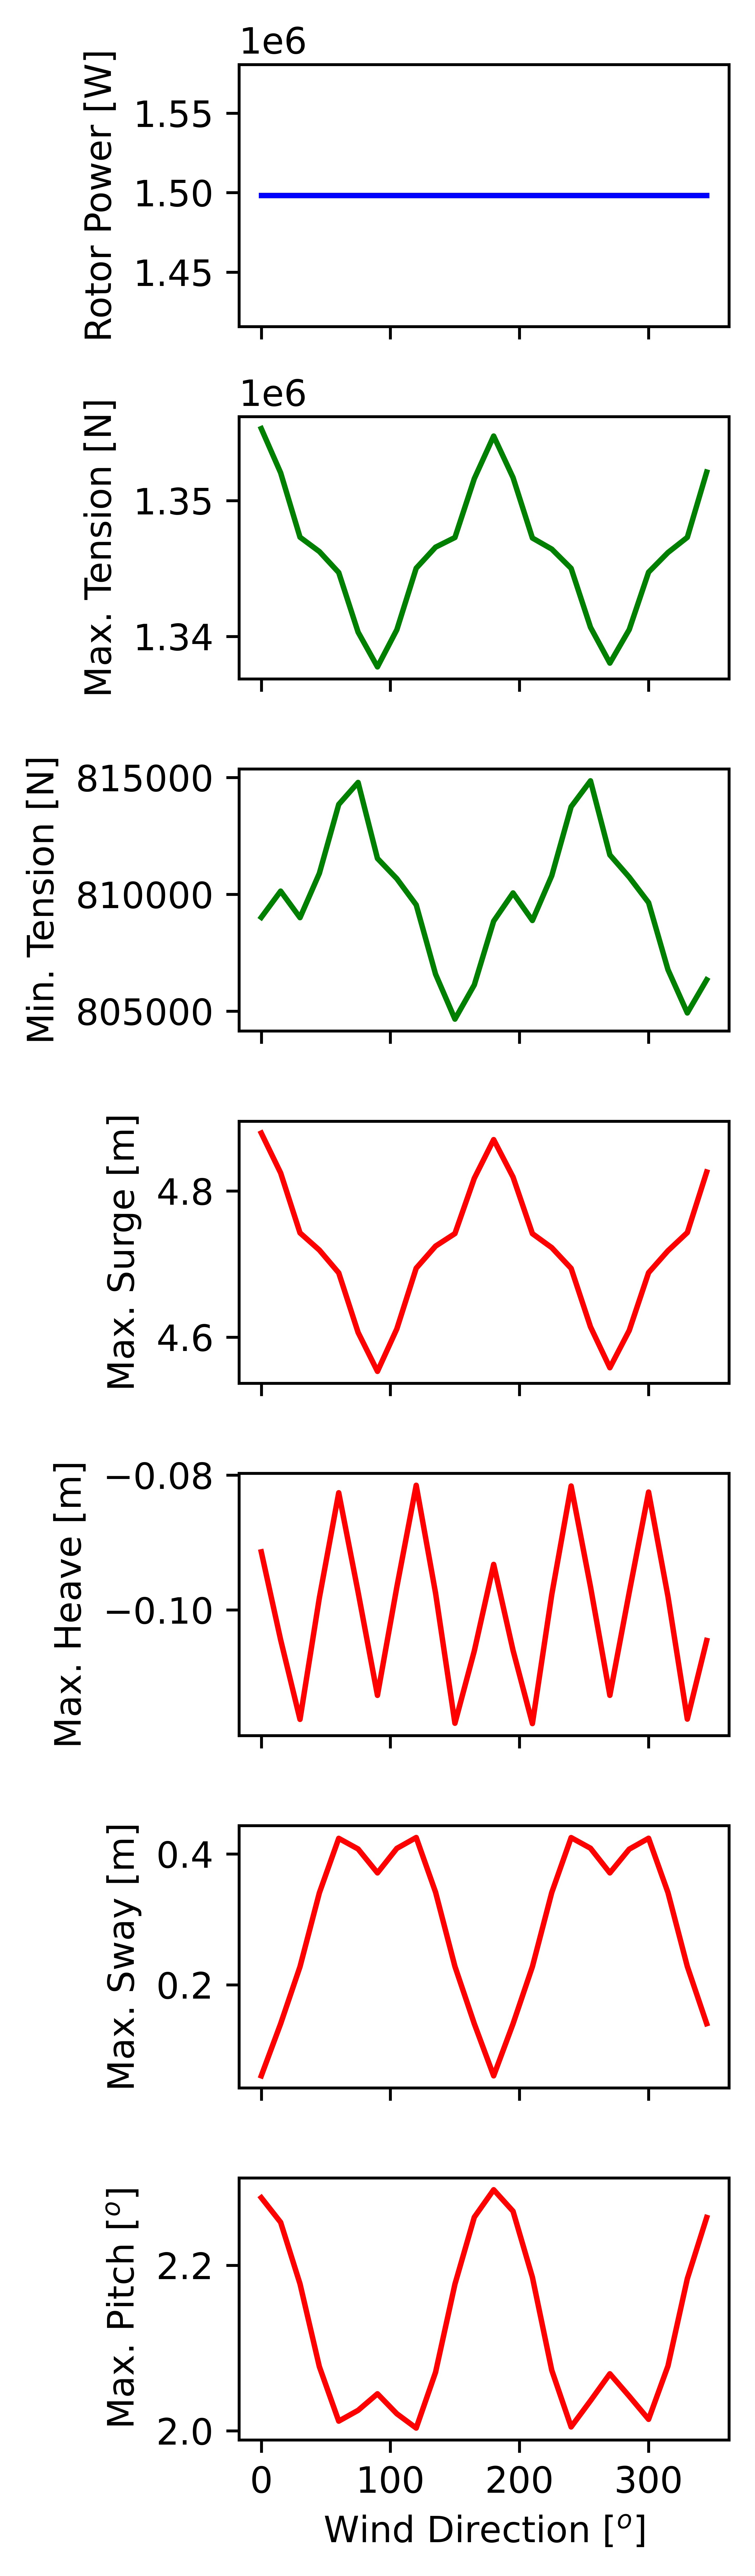

In [ ]:
# Create subplots with shared x-axis
fig, axes = plt.subplots(7, 1, sharex=True, figsize=(3, 10), dpi=1000)
# wind_heading = wind_heading*180/np.pi
# Plot data on each subplot
axes[0].plot(wind_heading, power, color='blue')
axes[0].set_ylabel('Rotor Power [W]')

axes[1].plot(wind_heading, tension_max, color='green')
axes[1].set_ylabel('Max. Tension [N]')

axes[2].plot(wind_heading, tension_min, color='green')
axes[2].set_ylabel('Min. Tension [N]')

axes[3].plot(wind_heading, surge_max, color='red')
axes[3].set_ylabel('Max. Surge [m]')

axes[4].plot(wind_heading, heave_max, color='red')
axes[4].set_ylabel('Max. Heave [m]')

axes[5].plot(wind_heading, sway_max, color='red')
axes[5].set_ylabel('Max. Sway [m]')

axes[6].plot(wind_heading, pitch_max, color='red')
axes[6].set_ylabel('Max. Pitch [$^o$]')

# axes[6].set_xlabel('Current Speed [m/s]')
# axes[6].set_xlabel('Wave Period [s]')
# axes[6].set_xlabel('Wave Height [m]')
axes[6].set_xlabel('Wind Direction [$^o$]')
# axes[6].set_xlabel('Wind Speed [m/s]')
# Adjust layout
plt.tight_layout()
plt.show()


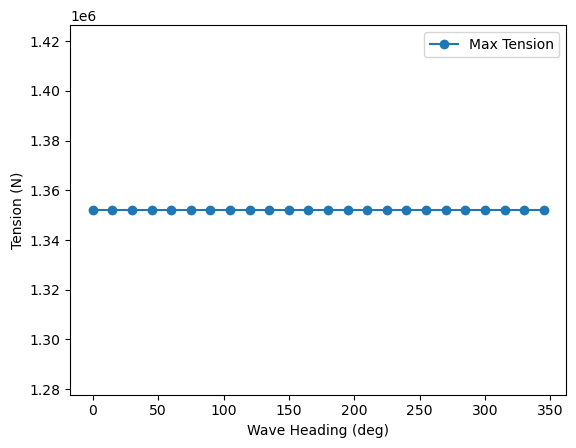

In [66]:
plt.plot(wind_heading*180/np.pi, np.array(tension_max), '-o', label='Max Tension')
# plt.plot(wind_heading*180/np.pi, np.array(tension_min), '-o', label='Min Tension')
plt.xlabel('Wave Heading (deg)')
plt.ylabel('Tension (N)')
plt.legend()

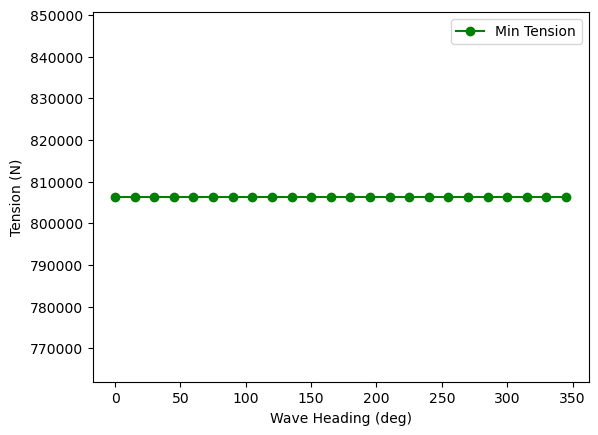

In [67]:
plt.plot(wind_heading*180/np.pi, np.array(tension_min), '-go', label='Min Tension')
# plt.plot(wind_heading*180/np.pi, np.array(tension_min), '-o', label='Min Tension')
plt.xlabel('Wave Heading (deg)')
plt.ylabel('Tension (N)')
plt.legend(loc='upper right')

In [64]:
(max(tension_max) - min(tension_min))/min(tension_max)*100

41.163055892048675

In [35]:
tension_11 = []
tension_12 = []
tension_21 = []
tension_22 = []
tension_31 = []
tension_32 = []

for tension_ in tension_all:
    tension_11.append(tension_[0])
    tension_12.append(tension_[1])
    tension_21.append(tension_[2])
    tension_22.append(tension_[3])
    tension_31.append(tension_[4])
    tension_32.append(tension_[5])


In [75]:
tension_1

array([982803.95850909, 981756.23305511, 979958.48197654, 981103.33549249,
       981365.59641159, 977977.89464533, 975010.76147923, 976008.34062275,
       977809.81837616, 977200.68179482, 976651.42482103, 979537.17505881,
       982456.42583139, 981542.9535451 , 979942.25627403, 981253.67893256,
       981612.15120065, 978259.70304011, 975217.2114083 , 976036.98695966,
       977714.02672016, 977109.82583063, 976792.44189276, 979883.34671756])

In [76]:
tension_2

array([909647.60263826, 908740.03617623, 908520.00424737, 911224.35653118,
       913853.30451726, 913307.44756674, 912111.44139269, 913386.55685529,
       914040.19925457, 911492.33692801, 908777.39465509, 908812.4634165 ,
       909485.72074129, 908637.276962  , 908475.39131954, 911235.80428699,
       913902.71770975, 913357.75282268, 912112.50729532, 913333.21464978,
       913994.23471196, 911509.41637924, 908898.5265314 , 908993.87708287])

In [77]:
tension_3

array([1182788.05993955, 1179885.04925248, 1176839.37307021,
       1177210.46661529, 1177816.85776042, 1176084.87951723,
       1175212.70407228, 1178266.01530162, 1181666.40227798,
       1181267.97106621, 1179793.21581542, 1181361.3085739 ,
       1182431.04384483, 1179641.74284396, 1176746.30701468,
       1177247.10286562, 1177917.25455952, 1176194.07640718,
       1175269.20212512, 1178182.11555707, 1181419.85091809,
       1180976.6726277 , 1179776.93884993, 1181671.59526044])

In [74]:
tension_1 = (np.array(tension_11) + np.array(tension_12))/2
tension_2 = (np.array(tension_21) + np.array(tension_22))/2
tension_3 = (np.array(tension_31) + np.array(tension_32))/2

In [ ]:
plt.plot(wind_heading*180/np.pi, np.array(tension_min), '-go', label='Min Tension')
# plt.plot(wind_heading*180/np.pi, np.array(tension_min), '-o', label='Min Tension')
plt.xlabel('Wave Heading (deg)')
plt.ylabel('Tension (N)')
plt.legend(loc='upper right')

In [42]:
design['cases']['data']

[[7.5,
  0,
  0.01,
  'operating',
  0,
  'JONSWAP',
  8.0,
  2,
  6.021385919380437,
  0.2,
  275]]

Text(0, 0.5, 'Max. Tension (N)')

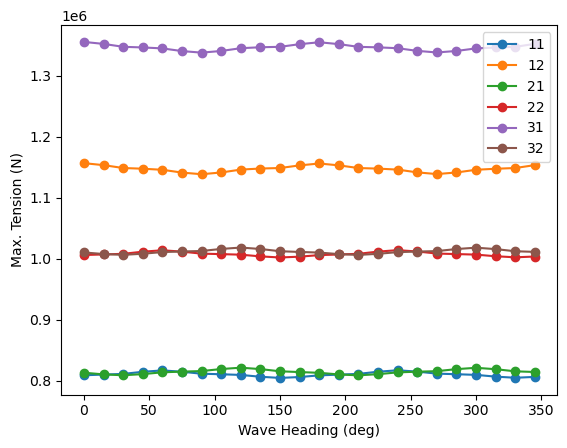

In [41]:
plt.plot(wind_heading*180/np.pi, np.array(tension_11), '-o', label='11')
plt.plot(wind_heading*180/np.pi, np.array(tension_12), '-o', label='12')
plt.plot(wind_heading*180/np.pi, np.array(tension_21), '-o', label='21')
plt.plot(wind_heading*180/np.pi, np.array(tension_22), '-o', label='22')
plt.plot(wind_heading*180/np.pi, np.array(tension_31), '-o', label='31')
plt.plot(wind_heading*180/np.pi, np.array(tension_32), '-o', label='32')
plt.legend()
plt.xlabel('Wave Heading (deg)')
plt.ylabel('Max. Tension (N)')

Text(0, 0.5, 'Max. Tension (N)')

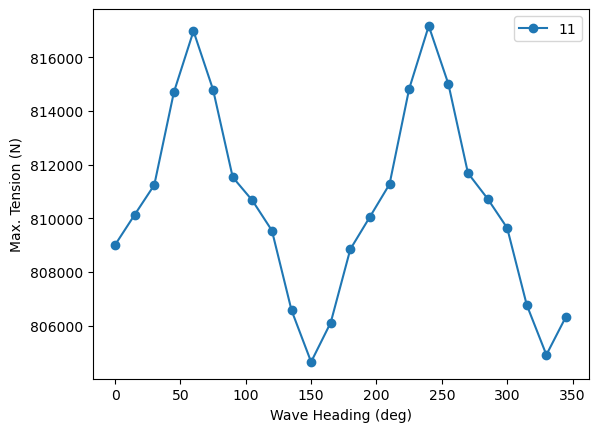

In [38]:
plt.plot(wind_heading*180/np.pi, np.array(tension_11), '-o', label='11')
# plt.plot(wind_heading*180/np.pi, np.array(tension_12), '-o', label='12')
# plt.plot(wind_heading*180/np.pi, np.array(tension_21), '-o', label='21')
# plt.plot(wind_heading*180/np.pi, np.array(tension_22), '-o', label='22')
# plt.plot(wind_heading*180/np.pi, np.array(tension_31), '-o', label='31')
# plt.plot(wind_heading*180/np.pi, np.array(tension_32), '-o', label='32')
plt.legend()
plt.xlabel('Wave Heading (deg)')
plt.ylabel('Max. Tension (N)')

In [45]:
(max(tension_11) - min(tension_11))/np.mean(tension_11)*100

1.5432601678285482

Text(0, 0.5, 'Max. Tension (N)')

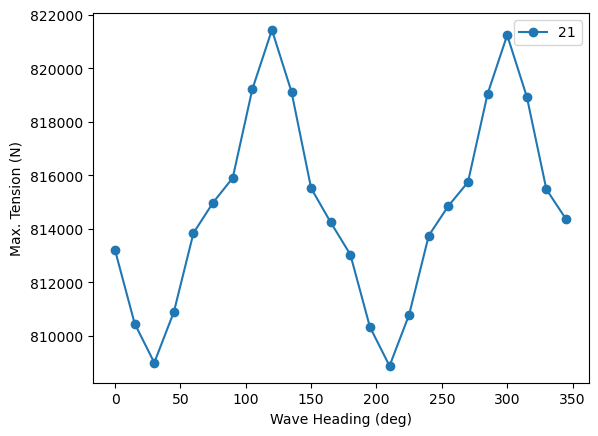

In [40]:
# plt.plot(wind_heading*180/np.pi, np.array(tension_11), '-o', label='11')
# plt.plot(wind_heading*180/np.pi, np.array(tension_12), '-o', label='12')
plt.plot(wind_heading*180/np.pi, np.array(tension_21), '-o', label='21')
# plt.plot(wind_heading*180/np.pi, np.array(tension_22), '-o', label='22')
# plt.plot(wind_heading*180/np.pi, np.array(tension_31), '-o', label='31')
# plt.plot(wind_heading*180/np.pi, np.array(tension_32), '-o', label='32')
plt.legend()
plt.xlabel('Wave Heading (deg)')
plt.ylabel('Max. Tension (N)')

In [24]:
model = raft.Model(design)
model.analyzeUnloaded()

model.solveEigen()
model.analyzeCases(display=1)

Making FOWT
Found mean offets of FOWT 1 with with surge = -0.00 m and pitch = -0.00 deg.

--------- Natural frequencies and mode shapes -------------
Mode        1         2         3         4         5         6
Fn (Hz)    0.0079    0.0079    0.0582    0.0398    0.0398    0.0115

DOF 1     -1.0000    0.0011    0.0000   -0.0000   -0.9966   -0.0000
DOF 2     -0.0002    1.0000    0.0000   -0.9966    0.0000   -0.0001
DOF 3      0.0000   -0.0000   -1.0000    0.0000   -0.0000   -0.0000
DOF 4     -0.0000    0.0007   -0.0000    0.0824   -0.0000    0.0000
DOF 5      0.0007   -0.0000    0.0000   -0.0000   -0.0824   -0.0000
DOF 6      0.0000   -0.0000   -0.0000    0.0000   -0.0000    1.0000
-----------------------------------------------------------

--------------------- Running Case 1 ----------------------
[12, 0, 0.01, 'operating', 0, 'JONSWAP', 13.1, 8.5, 0]
FOWT 1
 F_undisplaced +0.00e+00  +0.00e+00  +6.63e+05  +0.00e+00  -1.17e-07  +0.00e+00
Wind speed: 12.00 m/s, Omega: 12.11 rpm, Cp: 0

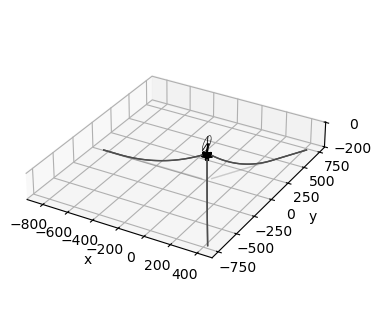

In [25]:
model.plot(hideGrid=False)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


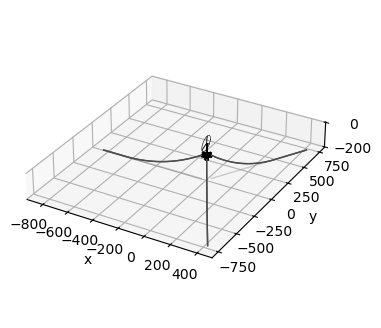

In [16]:
model.plot(hideGrid=False)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [21]:
(model.results['case_metrics'][0][0]['Tmoor_avg'])

array([ 800476.04951076, 1131815.69878584,  804617.471958  ,
        997476.80711525, 1330649.17061944, 1001598.31048741])

In [22]:
(model.results['case_metrics'][0][0]['Tmoor_max'])

[806338.8404587785,
 1153427.8529763424,
 814365.580172443,
 1003622.1739932983,
 1352108.3490076023,
 1011234.8415132676]